# Abstract 

#                          Video Games Analysis and Sales Prediction

#  Exploratory Data Analysis

## Retrive the data

In [1]:
cd C:\Users\LAB\Downloads

C:\Users\LAB\Downloads


In [2]:
data = 'Video_Games.csv'

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Importing necessary libraries

In [4]:
!pip install numpy

In [5]:
!pip install matplotlib

In [81]:
!pip install seaborn

In [82]:
!pip install statsmodels

In [83]:
import pandas as pd

import numpy as np
pd.plotting.register_matplotlib_converters()

# matplotlib for basic visulaisation
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn for more advanced plotting
import seaborn as sns

Reading the Data

In [84]:
df = pd.read_csv(data)

In [85]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [87]:
#caclulating the precentage of the missing values
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.602548
Critic_Score,51.330821
Critic_Count,51.330821
Rating,40.486871
User_Score,40.098092
Developer,39.613613
Year_of_Release,1.608948
Publisher,0.322986
Name,0.011962
Genre,0.011962


Upon further investigation, it has come to my attention that the critic_score and user_score columns contain missing values exceeding 40%. Normally, this would warrant dropping the affected rows. However, considering the significance of these features in our dataset, we have decided to explore alternative approaches to address the missing data issue.

In [88]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [89]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [90]:
# Replace 'tbd' values with NaN
df.replace('tbd', np.nan, inplace=True)

# Select the columns for correlation analysis
columns_for_correlation = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                           'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Calculate the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092562  0.003842 -0.168386     0.037700   
NA_Sales               -0.092562  1.000000  0.765336  0.449598     0.638654   
EU_Sales                0.003842  0.765336  1.000000  0.435068     0.722796   
JP_Sales               -0.168386  0.449598  0.435068  1.000000     0.291096   
Other_Sales             0.037700  0.638654  0.722796  0.291096     1.000000   
Global_Sales           -0.076433  0.941010  0.901239  0.612300     0.749242   
Critic_Score            0.011411  0.240755  0.220752  0.152593     0.198554   
Critic_Count            0.223407  0.295413  0.277533  0.180219     0.251639   
User_Count              0.175339  0.246429  0.283360  0.075638     0.238982   

                 Global_Sales  Critic_Score  Critic_Count  User_Count  
Year_of_Release     -0.076433      0.011411      0.223407    0.175339  
NA_Sales             0.941010      0.240755  

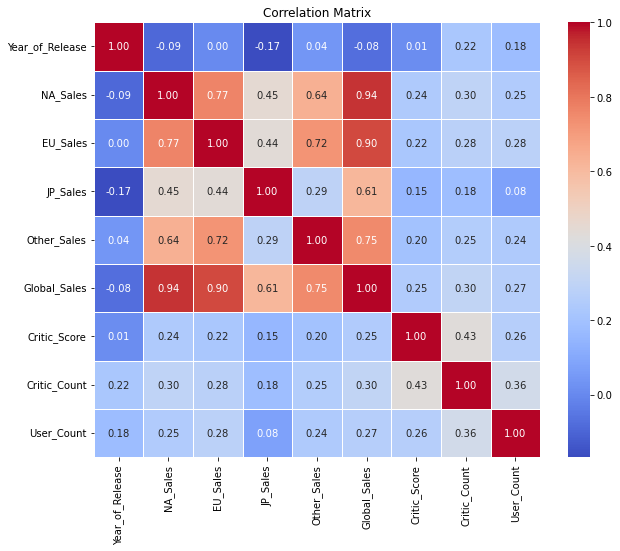

In [91]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


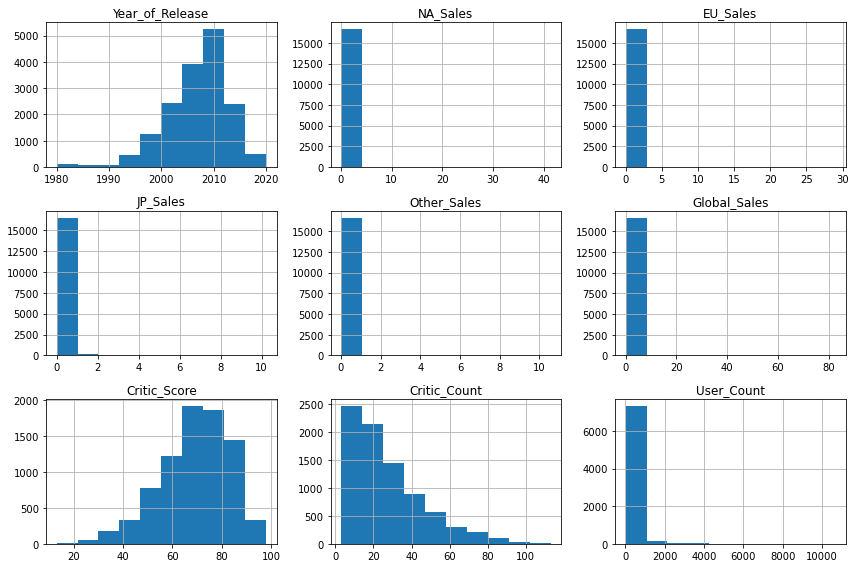

In [92]:
# Select the numerical columns for histogram analysis
numerical_columns = df.select_dtypes(include='number').columns

# Create histograms for each numerical attribute
df[numerical_columns].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


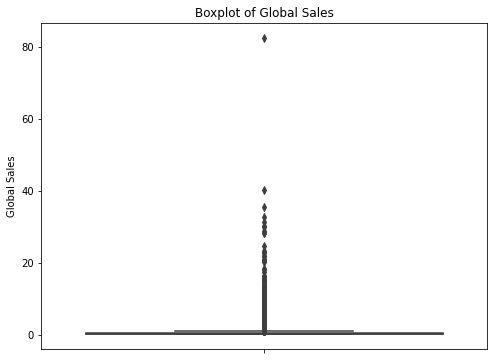

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers in 'Global_Sales'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Global_Sales')
plt.title("Boxplot of Global Sales")
plt.ylabel("Global Sales")
plt.show()


In [94]:
# Assuming you have a DataFrame named 'df' with your data
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Display correlation coefficients with the target variable
target_corr = correlation_matrix['Global_Sales']
print(target_corr)


Year_of_Release   -0.076433
NA_Sales           0.941010
EU_Sales           0.901239
JP_Sales           0.612300
Other_Sales        0.749242
Global_Sales       1.000000
Critic_Score       0.245471
Critic_Count       0.303571
User_Count         0.265012
Name: Global_Sales, dtype: float64


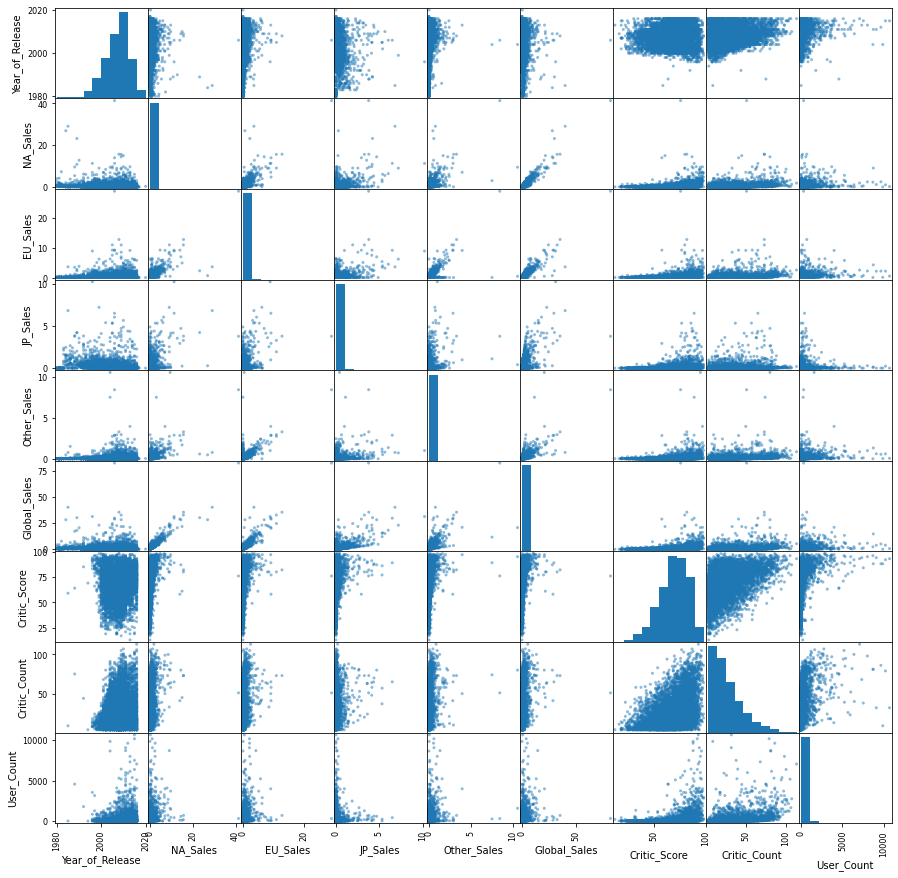

In [95]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select relevant numerical attributes
attributes = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

# Create a scatterplot matrix
scatter_matrix(df[attributes], figsize=(15, 15))
plt.show()


# Pre Processing 

In [96]:
data = pd.read_csv(data)

## Renaming the Columns 

In [97]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Sales"})

## Droping the Unwanted Columns 

since the other sales have high corelation they are going to effect the accuracy of our model and maybe cause overfitting 

so we are droping the name since it acts as an id to this data set and in order to simplify the model and try to avoid the overfitting.

In [98]:
data = data.drop(columns=['Name'])

## Handeling Missing Data

In [99]:
#caclulating the precentage of the missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.602548
Critic_Score,51.330821
Critic_Count,51.330821
Rating,40.486871
User_Score,40.098092
Developer,39.613613
Year,1.608948
Publisher,0.322986
Genre,0.011962


In [100]:
#dropping the duplicates
data.drop_duplicates(inplace=True)

In [101]:
# Assuming 'data' is your DataFrame
data.dropna(subset=['Year', 'Publisher', 'Genre'], inplace=True)


In [102]:
# Recalculate the percentage of missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': data_na})
missing_data.head(16)


,Missing Ratio
User_Count,53.998397
Critic_Score,50.786115
Critic_Count,50.786115
Rating,39.811332
User_Score,39.379740
Developer,38.966644


In [103]:
# Convert 'tbd' values to NaN
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

# Calculate the median excluding NaN values
median = data['User_Score'].median()

# Replace 'tbd' values with the median
data['User_Score'].replace(np.nan, median, inplace=True)

# Print the updated DataFrame
print(data)


      Platform    Year         Genre    Publisher     NA     EU     JP  Other  \
0          Wii  2006.0        Sports     Nintendo  41.36  28.96   3.77   8.45   
1          NES  1985.0      Platform     Nintendo  29.08   3.58   6.81   0.77   
2          Wii  2008.0        Racing     Nintendo  15.68  12.76   3.79   3.29   
3          Wii  2009.0        Sports     Nintendo  15.61  10.93   3.28   2.95   
4           GB  1996.0  Role-Playing     Nintendo  11.27   8.89  10.22   1.00   
...        ...     ...           ...          ...    ...    ...    ...    ...   
16712      GBA  2002.0      Platform        Kemco   0.01   0.00   0.00   0.00   
16713      PS2  2008.0        Racing   Activision   0.00   0.00   0.00   0.00   
16715     X360  2006.0        Sports  Codemasters   0.00   0.01   0.00   0.00   
16717      GBA  2003.0      Platform      Wanadoo   0.01   0.00   0.00   0.00   
16718      PSV  2016.0    Simulation   Tecmo Koei   0.00   0.00   0.01   0.00   

       Sales  Critic_Score 

In [104]:
# Recalculate the percentage of missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': data_na})
missing_data.head(16)


,Missing Ratio
User_Count,53.998397
Critic_Score,50.786115
Critic_Count,50.786115
Rating,39.811332
Developer,38.966644


In [105]:
# Replace missing values with median for each respective column
data['Critic_Score'].fillna(data['Critic_Score'].median(), inplace=True)
data['Critic_Count'].fillna(data['Critic_Count'].median(), inplace=True)
data['User_Count'].fillna(data['User_Count'].median(), inplace=True)
# Print the updated DataFrame
print(data)

      Platform    Year         Genre    Publisher     NA     EU     JP  Other  \
0          Wii  2006.0        Sports     Nintendo  41.36  28.96   3.77   8.45   
1          NES  1985.0      Platform     Nintendo  29.08   3.58   6.81   0.77   
2          Wii  2008.0        Racing     Nintendo  15.68  12.76   3.79   3.29   
3          Wii  2009.0        Sports     Nintendo  15.61  10.93   3.28   2.95   
4           GB  1996.0  Role-Playing     Nintendo  11.27   8.89  10.22   1.00   
...        ...     ...           ...          ...    ...    ...    ...    ...   
16712      GBA  2002.0      Platform        Kemco   0.01   0.00   0.00   0.00   
16713      PS2  2008.0        Racing   Activision   0.00   0.00   0.00   0.00   
16715     X360  2006.0        Sports  Codemasters   0.00   0.01   0.00   0.00   
16717      GBA  2003.0      Platform      Wanadoo   0.01   0.00   0.00   0.00   
16718      PSV  2016.0    Simulation   Tecmo Koei   0.00   0.00   0.01   0.00   

       Sales  Critic_Score 

In [106]:
#caclulating the precentage of the missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
Rating,39.811332
Developer,38.966644


In [107]:
mode_value = data['Rating'].mode()[0]

data['Rating'].fillna(mode_value, inplace=True)

In [108]:
mode_value = data['Developer'].mode()[0]

data['Developer'].fillna(mode_value, inplace=True)

In [109]:
#caclulating the precentage of the missing values
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [110]:
data

,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,22.0,7.5,24.0,Ubisoft,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,22.0,7.5,24.0,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16712,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,71.0,22.0,7.5,24.0,Ubisoft,E
16713,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,71.0,22.0,7.5,24.0,Ubisoft,E
16715,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,71.0,22.0,7.5,24.0,Ubisoft,E
16717,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,71.0,22.0,7.5,24.0,Ubisoft,E


## Type Transformation

In [111]:
column_dtypes = data.dtypes
print(column_dtypes)

Platform         object
Year            float64
Genre            object
Publisher        object
NA              float64
EU              float64
JP              float64
Other           float64
Sales           float64
Critic_Score    float64
Critic_Count    float64
User_Score      float64
User_Count      float64
Developer        object
Rating           object
dtype: object


In [112]:
data["Year"] = data["Year"].apply(int)

while working it seeems that user_score has an issue that "tdb" was the most repeated making it type as an object in the type so in order to fix it we have to replace it

In [113]:
# Count the occurrences of each unique value in the 'User_Score' column
value_counts = data['User_Score'].value_counts()

# Print the value counts
print(value_counts)


7.5    9007
7.8     322
8.0     285
8.2     276
8.3     252
       ... 
1.5       2
0.3       2
1.1       2
0.0       1
9.7       1
Name: User_Score, Length: 95, dtype: int64


In [114]:
column_dtypes = data.dtypes
print(column_dtypes)

Platform         object
Year              int64
Genre            object
Publisher        object
NA              float64
EU              float64
JP              float64
Other           float64
Sales           float64
Critic_Score    float64
Critic_Count    float64
User_Score      float64
User_Count      float64
Developer        object
Rating           object
dtype: object


In [115]:
import os
print(os.getcwd())

C:\Users\LAB\Downloads


In [116]:
data.to_csv('video_games24.csv', index = False)

## Encoding 

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
import pandas as pd

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Platform', 'Genre', 'Rating'], prefix=['Platform', 'Genre', 'Rating'], drop_first=True, dtype=int)

# Print the encoded dataframe
print(data)


       Year    Publisher     NA     EU     JP  Other  Sales  Critic_Score  \
0      2006     Nintendo  41.36  28.96   3.77   8.45  82.53          76.0   
1      1985     Nintendo  29.08   3.58   6.81   0.77  40.24          71.0   
2      2008     Nintendo  15.68  12.76   3.79   3.29  35.52          82.0   
3      2009     Nintendo  15.61  10.93   3.28   2.95  32.77          80.0   
4      1996     Nintendo  11.27   8.89  10.22   1.00  31.37          71.0   
...     ...          ...    ...    ...    ...    ...    ...           ...   
16712  2002        Kemco   0.01   0.00   0.00   0.00   0.01          71.0   
16713  2008   Activision   0.00   0.00   0.00   0.00   0.01          71.0   
16715  2006  Codemasters   0.00   0.01   0.00   0.00   0.01          71.0   
16717  2003      Wanadoo   0.01   0.00   0.00   0.00   0.01          71.0   
16718  2016   Tecmo Koei   0.00   0.00   0.01   0.00   0.01          71.0   

       Critic_Count  User_Score  ...  Genre_Simulation Genre_Sports  \
0   

In [119]:
label_encoder = LabelEncoder()

data['Developer'] = label_encoder.fit_transform(data['Developer'])
data['Publisher'] = label_encoder.fit_transform(data['Publisher'])


## Standerlization

In [120]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Year', 'Sales', 'Critic_Score', 'Critic_Count', 'User_Count']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [121]:
import os
print(os.getcwd())

C:\Users\LAB\Downloads


In [122]:
data.to_csv('1-6-2024.csv', index = False)

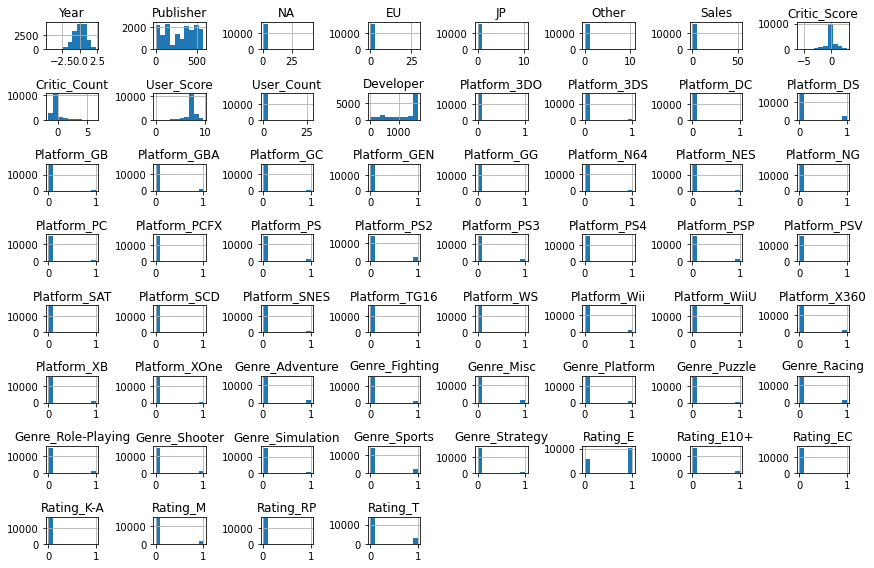

In [123]:
# Select the numerical columns for histogram analysis
numerical_columns = data.select_dtypes(include='number').columns

# Create histograms for each numerical attribute
data[numerical_columns].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


# Models 




## Decision Tree

## Necessary Library

In [124]:
!pip install pandas
!pip install scikit-learn
!pip install mlxtend
!pip install xgboost
!pip install imbalanced-learn


  Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)
  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.1.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-1.1.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [125]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint


## Splitting the Data

In [127]:
X = data.drop('Sales', axis = 1)
y = data['Sales'].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 100)

## Normal Models 

## Decision Tree

Mean Squared Error (MSE): 0.1653333301499222
Root Mean Squared Error (RMSE): 0.4066120142714947
Mean Absolute Error (MAE): 0.15408563621870522
R-squared (R2): 0.818918783715788


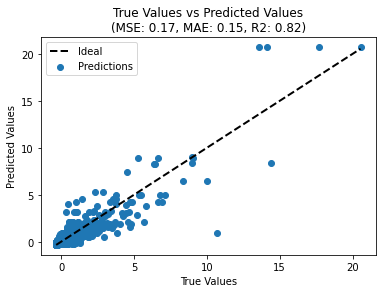

In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
random_state = 42
# Create the decision tree regression model
model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', criterion='mse', splitter='best')

# Train the model
model.fit(X_train, y_train)

# Make predictions with the model
predictions = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

# Visualize the accuracy
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values\n(MSE: {:.2f}, MAE: {:.2f}, R2: {:.2f})'.format(mse, mae, r2))
plt.legend(['Ideal', 'Predictions'])
plt.show()


## Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions using the trained model
predictions = linear_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 1.1124223055863714e-05
Root Mean Squared Error (RMSE): 0.003335299545147889
Mean Absolute Error (MAE): 0.0019148227058872344
R-squared (R2): 0.999987816202339


## Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create the random forest regressor model
rf_model = RandomForestRegressor(n_estimators=115, max_depth=1000, min_samples_split=8, min_samples_leaf=1, max_features='sqrt', random_state=500)
# Train the model
rf_model.fit(X_train, y_train)

# Make predictions with the trained model
predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 0.022828943956896743
Root Mean Squared Error (RMSE): 0.15109250132583266
R-squared (R2): 0.9749966148117236


## XGboosting

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

In [133]:
# Create an XGBoost regressor
xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.2,
                      max_depth= 12, alpha= 7, n_estimators= 1000)

# Train the model without cross-validation
xg_reg.fit(X_train, y_train)

# Make predictions with the model
predictions = xg_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.081176271950124
Root Mean Squared Error (RMSE): 0.2849144993680104
Mean Absolute Error (MAE): 0.06537466626665858
R-squared (R2): 0.9110917439041656


## SVM

In [134]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create the SVM regression model with chosen hyperparameters
model = SVR(C=1.5, kernel='rbf', epsilon=0.05, gamma='scale', degree=3)

# Train the model
model.fit(X_train, y_train)

# Make predictions with the trained model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 0.955590756403259
Root Mean Squared Error (RMSE): 0.9775432248260222
R-squared (R2): -0.04661011958412864


## Feature selection

Mean Squared Error (MSE): 0.022828943956896743
Root Mean Squared Error (RMSE): 0.15109250132583266
R-squared (R2): 0.9749966148117236
Feature Importances:
NA: 0.27906648266545786
EU: 0.23065552922387944
Other: 0.1646783276274166
JP: 0.15556953710397564
User_Count: 0.025631012197718083
Year: 0.021373043037675905
Critic_Score: 0.019966958110319406
Critic_Count: 0.01962886581805881
Genre_Sports: 0.011044981600720547
Publisher: 0.010778714415654983
User_Score: 0.006378405453195739
Platform_NES: 0.005796623104155314
Platform_Wii: 0.005281483176511216
Rating_E: 0.005246576043532972
Developer: 0.004619405309420875
Platform_GB: 0.003441678867090556
Genre_Role-Playing: 0.003037480642042062
Genre_Platform: 0.0025628630368663874
Genre_Shooter: 0.002488996135692539
Platform_PS2: 0.0024363901713114083
Platform_DS: 0.002358548428521878
Platform_PC: 0.0020749450118181093
Platform_X360: 0.001730433994952841
Rating_M: 0.0013763379186685915
Platform_PS3: 0.001055094924016427
Genre_Puzzle: 0.001002979442

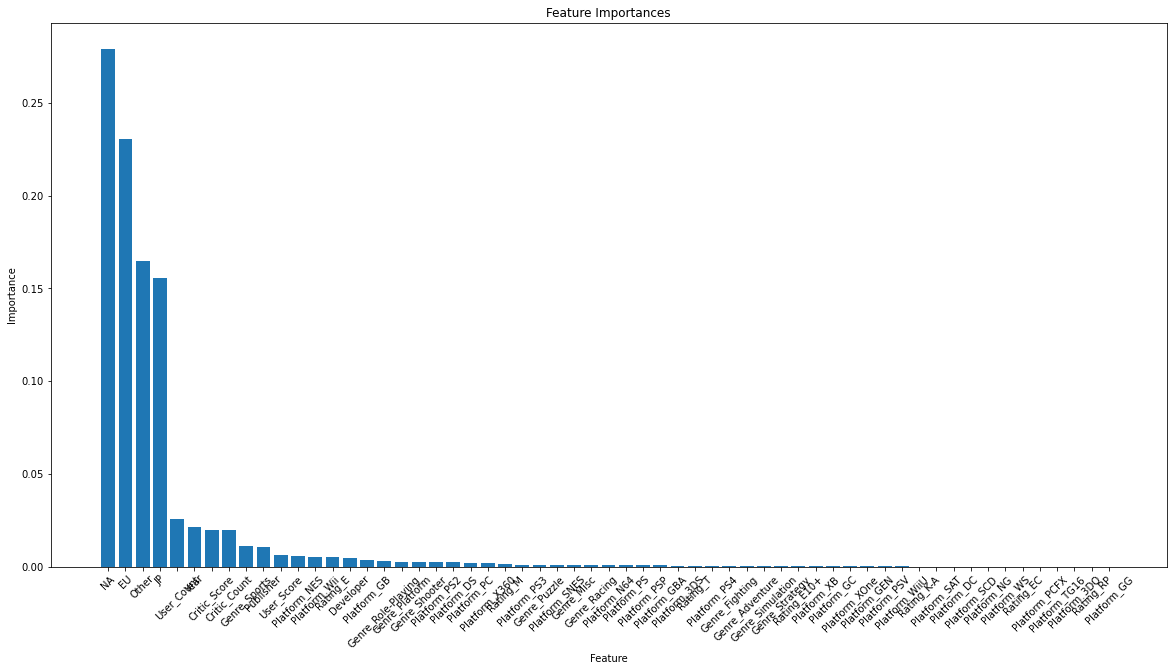

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Create the random forest regressor model
rf_model = RandomForestRegressor(n_estimators=115, max_depth=1000, min_samples_split=8, min_samples_leaf=1, max_features='sqrt', random_state=500)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions with the trained model
predictions = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)

# Extract feature importances from the best model
feature_importances = rf_model.feature_importances_

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print feature importance scores
print("Feature Importances:")
for i, idx in enumerate(sorted_idx):
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")

# Visualize feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [136]:
important_feature_indices = sorted_idx

# Create a new dataset with only important features
X_train_important = X_train.iloc[:, important_feature_indices]
X_test_important = X_test.iloc[:, important_feature_indices]


## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Decision Tree Regression with Important Features
dt_model_important = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                            max_features='sqrt', criterion='mse', splitter='best')

dt_model_important.fit(X_train_important, y_train)
predictions_dt_important = dt_model_important.predict(X_test_important)

mse_dt_important = mean_squared_error(y_test, predictions_dt_important)
rmse_dt_important = np.sqrt(mse_dt_important)
r2_dt_important = r2_score(y_test, predictions_dt_important)

print('Decision Tree Regression Metrics with Important Features:')
print('Mean Squared Error (MSE):', mse_dt_important)
print('Root Mean Squared Error (RMSE):', rmse_dt_important)
print('R-squared (R2):', r2_dt_important)

# Decision Tree Regression with All Features
dt_model_all = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2,
                                        max_features='sqrt', criterion='mse', splitter='best')

dt_model_all.fit(X_train, y_train)
predictions_dt_all = dt_model_all.predict(X_test)

mse_dt_all = mean_squared_error(y_test, predictions_dt_all)
rmse_dt_all = np.sqrt(mse_dt_all)
r2_dt_all = r2_score(y_test, predictions_dt_all)

print('Decision Tree Regression Metrics with All Features:')
print('Mean Squared Error (MSE):', mse_dt_all)
print('Root Mean Squared Error (RMSE):', rmse_dt_all)
print('R-squared (R2):', r2_dt_all)


Decision Tree Regression Metrics with Important Features:
Mean Squared Error (MSE): 0.28654035742617734
Root Mean Squared Error (RMSE): 0.5352946454301382
R-squared (R2): 0.68616687034493
Decision Tree Regression Metrics with All Features:
Mean Squared Error (MSE): 0.1961830843272474
Root Mean Squared Error (RMSE): 0.4429255968300403
R-squared (R2): 0.7851306116428406


## Linear Regression

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression with Important Features
lr_model_important = LinearRegression()
lr_model_important.fit(X_train_important, y_train)
predictions_lr_important = lr_model_important.predict(X_test_important)

mse_lr_important = mean_squared_error(y_test, predictions_lr_important)
rmse_lr_important = np.sqrt(mse_lr_important)
r2_lr_important = r2_score(y_test, predictions_lr_important)


print('Linear Regression Metrics with Important Features:')
print('Mean Squared Error (MSE):', mse_lr_important)
print('Root Mean Squared Error (RMSE):', rmse_lr_important)
print('R-squared (R2):', r2_lr_important)

# Linear Regression with All Features
lr_model_all = LinearRegression()
lr_model_all.fit(X_train, y_train)
predictions_lr_all = lr_model_all.predict(X_test)

mse_lr_all = mean_squared_error(y_test, predictions_lr_all)
rmse_lr_all = np.sqrt(mse_lr_all)
r2_lr_all = r2_score(y_test, predictions_lr_all)

print('Linear Regression Metrics with All Features:')
print('Mean Squared Error (MSE):', mse_lr_all)
print('Root Mean Squared Error (RMSE):', rmse_lr_all)
print('R-squared (R2):', r2_lr_all)


Linear Regression Metrics with Important Features:
Mean Squared Error (MSE): 1.1124223055820685e-05
Root Mean Squared Error (RMSE): 0.0033352995451414384
R-squared (R2): 0.999987816202339
Linear Regression Metrics with All Features:
Mean Squared Error (MSE): 1.1124223055863714e-05
Root Mean Squared Error (RMSE): 0.003335299545147889
R-squared (R2): 0.999987816202339


## Random Forest

In [139]:

# Assuming you have performed RandomizedSearchCV and have the best hyperparameters
# Replace this with the actual hyperparameters obtained from random_search.best_params_
best_hyperparameters = {'max_depth': 166, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 58}

# Create the random forest regressor model with the reduced feature set
best_rf_model_important = RandomForestRegressor(random_state=500, **best_hyperparameters)
best_rf_model_important.fit(X_train_important, y_train)

# Make predictions with the trained model using the important features
predictions_important = best_rf_model_important.predict(X_test_important)

# Calculate evaluation metrics for the important features
mse_important = mean_squared_error(y_test, predictions_important)
rmse_important = np.sqrt(mse_important)
r2_important = r2_score(y_test, predictions_important)

# Print the evaluation metrics for the important features
print('Mean Squared Error (MSE) with Important Features:', mse_important)
print('Root Mean Squared Error (RMSE) with Important Features:', rmse_important)
print('R-squared (R2) with Important Features:', r2_important)

# Now, if you want to compare, train the model using all features
rf_model.fit(X_train, y_train)

# Make predictions with the trained model using all features
predictions_all = rf_model.predict(X_test)

# Calculate evaluation metrics for all features
mse_all = mean_squared_error(y_test, predictions_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test, predictions_all)

# Print the evaluation metrics for all features
print('Mean Squared Error (MSE) with All Features:', mse_all)
print('Root Mean Squared Error (RMSE) with All Features:', rmse_all)
print('R-squared (R2) with All Features:', r2_all)

Mean Squared Error (MSE) with Important Features: 0.028512644886188855
Root Mean Squared Error (RMSE) with Important Features: 0.16885687692892123
R-squared (R2) with Important Features: 0.9687715452728796
Mean Squared Error (MSE) with All Features: 0.022828943956896743
Root Mean Squared Error (RMSE) with All Features: 0.15109250132583266
R-squared (R2) with All Features: 0.9749966148117236


## XGBOOSTING

In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

In [141]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost Regression with Important Features
xgb_model_important = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.2,
                                    max_depth=166, alpha=8, n_estimators=58)

xgb_model_important.fit(X_train_important, y_train)
predictions_xgb_important = xgb_model_important.predict(X_test_important)

mse_xgb_important = mean_squared_error(y_test, predictions_xgb_important)
rmse_xgb_important = np.sqrt(mse_xgb_important)
r2_xgb_important = r2_score(y_test, predictions_xgb_important)

print('XGBoost Regression Metrics with Important Features:')
print('Mean Squared Error (MSE):', mse_xgb_important)
print('Root Mean Squared Error (RMSE):', rmse_xgb_important)
print('R-squared (R2):', r2_xgb_important)

# XGBoost Regression with All Features
xgb_model_all = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.2,
                                    max_depth=166, alpha=8, n_estimators=58)

xgb_model_all.fit(X_train, y_train)
predictions_xgb_all = xgb_model_all.predict(X_test)

mse_xgb_all = mean_squared_error(y_test, predictions_xgb_all)
rmse_xgb_all = np.sqrt(mse_xgb_all)
r2_xgb_all = r2_score(y_test, predictions_xgb_all)

print('XGBoost Regression Metrics with All Features:')
print('Mean Squared Error (MSE):', mse_xgb_all)
print('Root Mean Squared Error (RMSE):', rmse_xgb_all)
print('R-squared (R2):', r2_xgb_all)


XGBoost Regression Metrics with Important Features:
Mean Squared Error (MSE): 0.07463789148521147
Root Mean Squared Error (RMSE): 0.27319936216106266
R-squared (R2): 0.9182529006173442
XGBoost Regression Metrics with All Features:
Mean Squared Error (MSE): 0.07653573103754985
Root Mean Squared Error (RMSE): 0.2766509190976055
R-squared (R2): 0.9161742931512146


## SVM 

In [142]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# SVM Regression with Important Features
svm_model_important = SVR(kernel='linear', C=1)

svm_model_important.fit(X_train_important, y_train)
predictions_svm_important = svm_model_important.predict(X_test_important)

mse_svm_important = mean_squared_error(y_test, predictions_svm_important)
rmse_svm_important = np.sqrt(mse_svm_important)
r2_svm_important = r2_score(y_test, predictions_svm_important)

print('SVM Regression Metrics with Important Features:')
print('Mean Squared Error (MSE):', mse_svm_important)
print('Root Mean Squared Error (RMSE):', rmse_svm_important)
print('R-squared (R2):', r2_svm_important)

# SVM Regression with All Features
svm_model_all = SVR(kernel='linear', C=1)

svm_model_all.fit(X_train, y_train)
predictions_svm_all = svm_model_all.predict(X_test)

mse_svm_all = mean_squared_error(y_test, predictions_svm_all)
rmse_svm_all = np.sqrt(mse_svm_all)
r2_svm_all = r2_score(y_test, predictions_svm_all)

print('SVM Regression Metrics with All Features:')
print('Mean Squared Error (MSE):', mse_svm_all)
print('Root Mean Squared Error (RMSE):', rmse_svm_all)
print('R-squared (R2):', r2_svm_all)


SVM Regression Metrics with Important Features:
Mean Squared Error (MSE): 0.0023657120715518624
Root Mean Squared Error (RMSE): 0.048638586241294704
R-squared (R2): 0.9974089554785692
SVM Regression Metrics with All Features:
Mean Squared Error (MSE): 0.0023661559198681894
Root Mean Squared Error (RMSE): 0.0486431487454111
R-squared (R2): 0.9974084693540057


## Cross Validation and Randomized Search 

## Decision Tree model 


In [143]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regression model
model = DecisionTreeRegressor()

# Define the hyperparameter grid for randomized search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20 , 25 , 30 , 35 , 40],
    'min_samples_split': randint(2, 50).rvs(size=10),  # Generating 10 random values between 2 and 50
    'min_samples_leaf': randint(1, 20).rvs(size=10),  # Generating 10 random values between 1 and 20
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=42)

# Fit the model and perform randomized search
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Print the best model, its hyperparameters, and cross-validation results
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)

# Fit the model and make predictions
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


Best Model: DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      max_features='sqrt', min_samples_leaf=9,
                      min_samples_split=10)
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'friedman_mse'}
Cross-Validation RMSE Scores: [1.14421667 0.41368863 0.72520261 0.40170474 0.49964429 0.64421345
 0.53715423 0.46929377 0.32918284 0.66304758]


In [144]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 0.1911368210994208
Mean Absolute Error (MAE): 0.15410198862142582
R-squared (R2): 0.7906575279769913


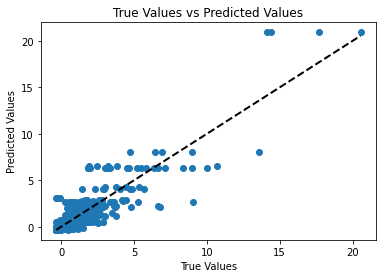

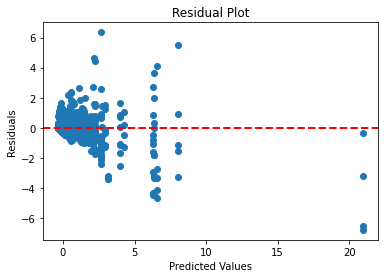

In [145]:

# Plotting predicted values against true values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Linear Regression 

In [146]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the hyperparameter grid for randomized search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 4],  # Adjust the number of jobs as needed
    'positive': [True, False]
}

# Create the linear regression model
linear_model = LinearRegression()

# Perform the randomized search with cross-validation
random_search = RandomizedSearchCV(
    estimator=linear_model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_iter=7,
    random_state=42,
    cv=5  # You can adjust the number of cross-validation folds
)

random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Make predictions using the best model
predictions = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)


Best Model: LinearRegression(copy_X=False)
Best Parameters: {'positive': False, 'n_jobs': None, 'fit_intercept': True, 'copy_X': False}
Cross-Validation RMSE Scores: [0.00331116 0.00338076 0.00337019 0.00333057 0.00336424]
Mean Squared Error (MSE): 1.1124223055863714e-05
Root Mean Squared Error (RMSE): 0.003335299545147889
Mean Absolute Error (MAE): 0.0019148227058872344
R-squared (R2): 0.999987816202339


In [147]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1.1124223055863714e-05
Mean Absolute Error (MAE): 0.0019148227058872344
R-squared (R2): 0.999987816202339


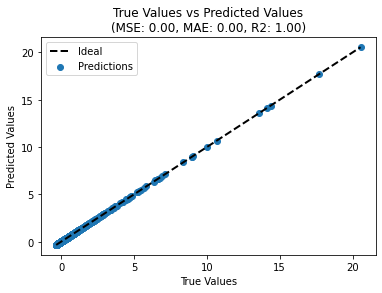

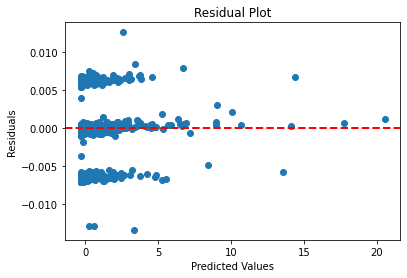

In [148]:
# Plotting predicted values against true values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values\n(MSE: {:.2f}, MAE: {:.2f}, R2: {:.2f})'.format(mse, mae, r2))
plt.legend(['Ideal', 'Predictions'])
plt.show()

# Plotting residuals
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Random Forest

In [149]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for the randomized search
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 6, 7],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt'],
    'random_state': [42, 55, 30, 21]
}

# Create the random forest regressor model
rf_model = RandomForestRegressor()

# Perform the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, scoring='neg_mean_squared_error', n_iter=10, random_state=100, cv=5)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

# Make predictions with the best model
predictions = best_rf_model.predict(X_test)

# Print the results
print("Best Parameters:", best_params)
print("Best RMSE Score:", best_score)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)


Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 235, 'random_state': 55}
Best RMSE Score: 0.3427796387508316
Cross-Validation RMSE Scores: [0.66551302 0.2350683  0.15685817 0.16053011 0.19735835]


In [150]:
# Make predictions with the best model
predictions = best_rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.03225914507660922
Root Mean Squared Error (RMSE): 0.17960831015465076
Mean Absolute Error (MAE): 0.06301193684103416
R-squared (R2): 0.96466819351268


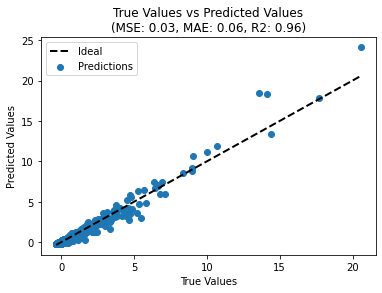

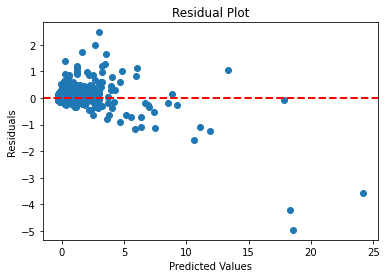

In [151]:
import matplotlib.pyplot as plt

# Assuming you have predictions, y_test, mse, mae, and r2 defined

# Plotting predicted values against true values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values\n(MSE: {:.2f}, MAE: {:.2f}, R2: {:.2f})'.format(mse, mae, r2))
plt.legend(['Ideal', 'Predictions'])
plt.show()

# Plotting residuals
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


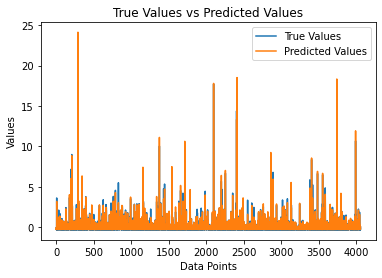

In [152]:
import matplotlib.pyplot as plt

# Plotting predicted values and true values
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

## XGBoosting 

In [153]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [154]:
# Create an XGBoost regressor
xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Define the parameter grid for the randomized search
param_grid = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 8),
    'learning_rate': uniform(0.001, 0.1),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'random_state': [42, 41, 45, 48, 30]
}

# Create RandomizedSearchCV object
xgb_random = RandomizedSearchCV(xg_reg, param_distributions=param_grid, n_iter=25, scoring='neg_mean_squared_error', cv= 7, n_jobs=-1)

# Train the model
xgb_random.fit(X_train, y_train)

# Make predictions with the model
predictions = xgb_random.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)


Mean Squared Error (MSE): 0.033899231566436684
Root Mean Squared Error (RMSE): 0.1841174396042827
Mean Absolute Error (MAE): 0.02796390935000302
R-squared (R2): 0.9628718899112225


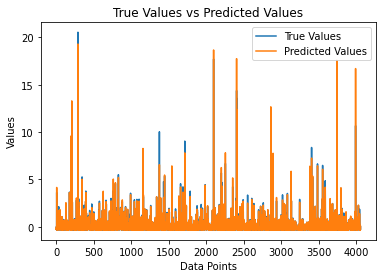

In [155]:
import matplotlib.pyplot as plt

# Plotting predicted values and true values
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

## Support Vector Machine 

In [156]:
from scipy.stats import uniform, randint
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# Create the SVM regression model
model = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': uniform(loc=0.1, scale=10),
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': uniform(loc=0.001, scale=0.1),
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=6, n_iter=10)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)


In [159]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error
print('Mean Absolute Error (MAE):', mae)


print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Mean Absolute Error (MAE): 0.013029153661677713
Mean Squared Error (MSE): 0.0002511095499622031
R-squared (R2): 0.9997249724378835


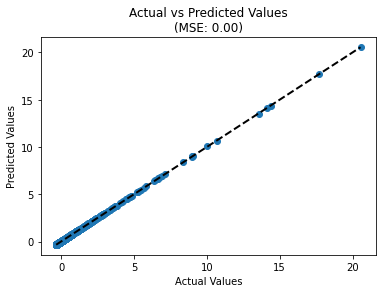

In [157]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Visualization
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values\n(MSE: {:.2f})'.format(mse))
plt.show()

## Champion Model 

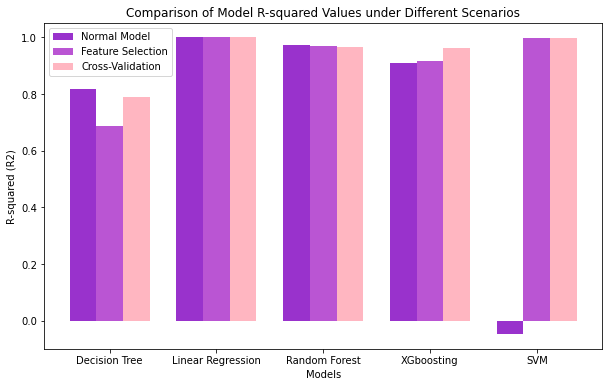

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Decision Tree', 'Linear Regression', 'Random Forest', 'XGboosting', 'SVM']

# R-squared values for normal, feature selection, and cross-validation (replace with your actual values)
normal_r2 = [0.818918783715788, 0.999987816202339, 0.9749966148117236, 0.9110917439041656, -0.04661011958412864]
feature_selection_r2 = [0.68616687034493, 0.999987816202339, 0.9687715452728796, 0.9182529006173442, 0.9974089554785692]
cross_val_r2 = [0.7906575279769913, 0.999987816202339, 0.96466819351268, 0.9628718899112225, 0.9997249724378835]

# Bar Chart
bar_width = 0.25
index = np.arange(len(models))

plt.figure(figsize=(10, 6))  # Increase figure size

colors = ['darkorchid', 'mediumorchid', 'lightpink']



plt.bar(index, normal_r2, width=bar_width, label='Normal Model', color=colors[0])
plt.bar(index + bar_width, feature_selection_r2, width=bar_width, label='Feature Selection', color=colors[1])
plt.bar(index + 2 * bar_width, cross_val_r2, width=bar_width, label='Cross-Validation', color=colors[2])

# Customize the plot
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of Model R-squared Values under Different Scenarios')
plt.xticks(index + bar_width, models)
plt.legend()

# Show the plot
plt.show()
